# Projet de masse de données et fouille de données

## Etape III : Fouille de données

Ce script fait suite directement au script de nettoyage des données (Etape II).

Il est nécessaire de lire les scripts précédents, pour comprendre ce qui est réalisé ici.

Dans ce script, nous appliquons des méthodes de fouilles de données, afin de concevoir des modèles de prédictions des données du Covid-19 aux Etats-Unis.

### Import des librairies

On commence par importer les librairies.

In [1]:
import pandas
import numpy
import matplotlib.pyplot
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from sklearn import preprocessing
import time
import datetime
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

### Import des données

Puis, on importe les données de notre jeu de données <b>nettoyé</b>, et on les "wrap" dans un DataFrame de Pandas.

In [2]:
data = pandas.read_csv("../data/cleaned_data.csv")
dataFrame = pandas.DataFrame(data)
dataFrame

,id,date,county,state,fips,cases,deaths
0,0,2020-01-21,Snohomish,Washington,53061,1,0
1,1,2020-01-22,Snohomish,Washington,53061,1,0
2,2,2020-01-23,Snohomish,Washington,53061,1,0
3,3,2020-01-24,Cook,Illinois,17031,1,0
4,4,2020-01-24,Snohomish,Washington,53061,1,0
...,...,...,...,...,...,...,...
775341,800432,2020-12-05,Sweetwater,Wyoming,56037,2098,10
775342,800433,2020-12-05,Teton,Wyoming,56039,1739,2
775343,800434,2020-12-05,Uinta,Wyoming,56041,1187,5
775344,800435,2020-12-05,Washakie,Wyoming,56043,519,8


### Fouille des données

#### Complétion des données

On commence par rendre les données plus complètes. En effet, pour les modèles de prédicion certaines données peuvent être ajoutées. 

On déduit le numéro de l'état (colonne "state") à partir de la colonne "fips", qui est le numéro du comté (colonne "county"). En effet, le numéro de l'état correspond aux deux premiers chiffres du numéro du comté. C'est le même principe que pour les départements et villes en France. Par exemple : Meuthe-Et-Moselle -> 54 et Nancy -> 54000.

In [3]:
completedDataFrame = dataFrame.copy()
completedDataFrame['state_fips'] = (completedDataFrame['fips'] / 1000).apply(int)
completedDataFrame = completedDataFrame.rename(columns = {'fips': 'county_fips'})
completedDataFrame = completedDataFrame[['id', 'date', 'county', 'county_fips', 'state', 'state_fips', 'cases' , 'deaths']]

In [4]:
completedDataFrame

,id,date,county,county_fips,state,state_fips,cases,deaths
0,0,2020-01-21,Snohomish,53061,Washington,53,1,0
1,1,2020-01-22,Snohomish,53061,Washington,53,1,0
2,2,2020-01-23,Snohomish,53061,Washington,53,1,0
3,3,2020-01-24,Cook,17031,Illinois,17,1,0
4,4,2020-01-24,Snohomish,53061,Washington,53,1,0
...,...,...,...,...,...,...,...,...
775341,800432,2020-12-05,Sweetwater,56037,Wyoming,56,2098,10
775342,800433,2020-12-05,Teton,56039,Wyoming,56,1739,2
775343,800434,2020-12-05,Uinta,56041,Wyoming,56,1187,5
775344,800435,2020-12-05,Washakie,56043,Wyoming,56,519,8


#### Sélection des données

Puis, on ne retient que les colonnes qui vont nous servir pour les modèles de prédiction. On retire la colonne "id", on retire la colonne "county" qui fait doublon à "county_fips", et qui est moins utile, et de même pour "state" qui fait doublon avec "state_fips" et qui est moins utile également.

In [5]:
reducedDataFrame = completedDataFrame.copy()
reducedDataFrame = reducedDataFrame.drop(columns = ['id', 'county', 'state'])

In [6]:
reducedDataFrame

,date,county_fips,state_fips,cases,deaths
0,2020-01-21,53061,53,1,0
1,2020-01-22,53061,53,1,0
2,2020-01-23,53061,53,1,0
3,2020-01-24,17031,17,1,0
4,2020-01-24,53061,53,1,0
...,...,...,...,...,...
775341,2020-12-05,56037,56,2098,10
775342,2020-12-05,56039,56,1739,2
775343,2020-12-05,56041,56,1187,5
775344,2020-12-05,56043,56,519,8


#### Première normalisation des données

Ensuite on efffectue une prmeière étape de normalisation des données. La normalisation étant une opération permettant de rendre un ensemble de données comparables entre elles.

On fait une première étape de normalisation donc pour la date en la trsanformant en entier.

In [7]:
normalizedDataFrame = reducedDataFrame.copy()
normalizedDataFrame.dtypes

date           object
county_fips     int64
state_fips      int64
cases           int64
deaths          int64
dtype: object

In [8]:
normalizedDataFrame = normalizedDataFrame.convert_dtypes()
normalizedDataFrame.dtypes

date           string
county_fips     Int64
state_fips      Int64
cases           Int64
deaths          Int64
dtype: object

In [9]:
normalizedDataFrame['date'] = pandas.to_datetime(normalizedDataFrame['date'])
normalizedDataFrame.dtypes

date           datetime64[ns]
county_fips             Int64
state_fips              Int64
cases                   Int64
deaths                  Int64
dtype: object

In [10]:
normalizedDataFrame['date'] = (normalizedDataFrame['date'].astype(numpy.int64) / 100000000000).apply(int)
normalizedDataFrame

,date,county_fips,state_fips,cases,deaths
0,15795648,53061,53,1,0
1,15796512,53061,53,1,0
2,15797376,53061,53,1,0
3,15798240,17031,17,1,0
4,15798240,53061,53,1,0
...,...,...,...,...,...
775341,16071264,56037,56,2098,10
775342,16071264,56039,56,1739,2
775343,16071264,56041,56,1187,5
775344,16071264,56043,56,519,8


#### Melange des données

On mélange les données pour éviter toute forme de biais dans notre fouille de données.

In [11]:
normalizedDataFrame = shuffle(normalizedDataFrame)
normalizedDataFrame

,date,county_fips,state_fips,cases,deaths
17330,15853536,54077,54,1,0
302403,15940800,29019,29,547,2
485589,15991776,28139,28,563,16
691070,16048800,13001,13,1288,38
758104,16066944,29203,29,340,9
...,...,...,...,...,...
304366,15941664,12125,12,99,2
593033,16021152,48217,48,724,15
440183,15978816,51095,51,662,17
463816,15985728,29119,29,1044,11


#### Conception d'un modèle de prédiction du nombre de morts par régression

On commence la fouille de données avec une étude ayant pour finalité de pouvoir prédire le nombre de morts. Nos variables explicatives sont la date, le comté, l'état et le nombre de cas, et notre variable résultat à prédire est le nombre de morts.  Notre modèle utilisera comme méthode de fouille de données : la régression.

##### Division des données en deux ensembles : données pour les prédictions, et données pour le modèle

On prend les 100 premières lignes pour faire le sous-ensmeble des données qui servira à étudier les  justesse des prédictions du modèle que nosu allons faire. Et on prend les ligens restantes (un peu près 750 000) pour faire le sous-ensemble des données qui serviront à entrainer et à tester le modèle le modèle.

In [12]:
deathsModelDataFrame = normalizedDataFrame.copy()
deathsModelDataFrame 

,date,county_fips,state_fips,cases,deaths
17330,15853536,54077,54,1,0
302403,15940800,29019,29,547,2
485589,15991776,28139,28,563,16
691070,16048800,13001,13,1288,38
758104,16066944,29203,29,340,9
...,...,...,...,...,...
304366,15941664,12125,12,99,2
593033,16021152,48217,48,724,15
440183,15978816,51095,51,662,17
463816,15985728,29119,29,1044,11


In [13]:
deathsModelForPredictionDataFrame = deathsModelDataFrame.iloc[:100,]
deathsModelForPredictionDataFrame 

,date,county_fips,state_fips,cases,deaths
17330,15853536,54077,54,1,0
302403,15940800,29019,29,547,2
485589,15991776,28139,28,563,16
691070,16048800,13001,13,1288,38
758104,16066944,29203,29,340,9
...,...,...,...,...,...
709426,16053120,55061,55,1444,13
456873,15984000,19117,19,85,5
477206,15989184,47065,47,8136,77
76938,15874272,48239,48,6,0


In [14]:
deathsModelDataFrame = deathsModelDataFrame.iloc[100:,]
deathsModelDataFrame

,date,county_fips,state_fips,cases,deaths
557468,16011648,28157,28,305,18
64186,15870816,13257,13,30,1
350889,15954624,17117,17,101,3
324255,15946848,36101,36,278,19
420439,15973632,36021,36,551,47
...,...,...,...,...,...
304366,15941664,12125,12,99,2
593033,16021152,48217,48,724,15
440183,15978816,51095,51,662,17
463816,15985728,29119,29,1044,11


##### Division des deux nouveaux ensembles en variables explicatives ("date", "count_fips", "state_fips", "cases") et variable résultat ("deaths")

On sépare nos deux nouveaux ensembles avec les variables explicatives d'un côté ("date", "count_fips", "state_fips", "cases") et la variable résultat d'un autre côté ("deaths").

Note : 
- EV <=> Explanatory Variable <=> Variables Explicative
- RV <=> Result Variable <=> Variable Résultat

In [15]:
deathsModelForPredictionEVDataFrame = deathsModelForPredictionDataFrame.iloc[:,:4]
deathsModelForPredictionEVDataFrame

,date,county_fips,state_fips,cases
17330,15853536,54077,54,1
302403,15940800,29019,29,547
485589,15991776,28139,28,563
691070,16048800,13001,13,1288
758104,16066944,29203,29,340
...,...,...,...,...
709426,16053120,55061,55,1444
456873,15984000,19117,19,85
477206,15989184,47065,47,8136
76938,15874272,48239,48,6


In [16]:
deathsModelForPredictionRVDataFrame = deathsModelForPredictionDataFrame.iloc[:,4:]
deathsModelForPredictionRVDataFrame

,deaths
17330,0
302403,2
485589,16
691070,38
758104,9
...,...
709426,13
456873,5
477206,77
76938,0


In [17]:
deathsModelEVDataFrame = deathsModelDataFrame.iloc[:,:4]
deathsModelEVDataFrame

,date,county_fips,state_fips,cases
557468,16011648,28157,28,305
64186,15870816,13257,13,30
350889,15954624,17117,17,101
324255,15946848,36101,36,278
420439,15973632,36021,36,551
...,...,...,...,...
304366,15941664,12125,12,99
593033,16021152,48217,48,724
440183,15978816,51095,51,662
463816,15985728,29119,29,1044


In [18]:
deathsModelRVDataFrame = deathsModelDataFrame.iloc[:,4:]
deathsModelRVDataFrame

,deaths
557468,18
64186,1
350889,3
324255,19
420439,47
...,...
304366,2
593033,15
440183,17
463816,11


###### Division en deux des ensembles des données du modèle : données d'entrainement et données de test

On sépare les ensembles du modèle : des variables explicatives et de la variable de résultat en ensemble d'entrainement et de test. 25% des lignes vont pour les tests, et 75% vont pour l'entrainement.

In [19]:
deathsModelEVTrainDataFrame, deathsModelEVTestDataFrame, deathsModelRVTrainDataFrame, deathsModelRVTestDataFrame = train_test_split(deathsModelEVDataFrame, deathsModelRVDataFrame, test_size=0.25, random_state=1)

In [20]:
deathsModelEVTrainDataFrame

,date,county_fips,state_fips,cases
447783,15981408,22007,22,631
402244,15968448,45027,45,836
516614,16000416,26081,26,9092
478473,15990048,16081,16,131
535695,16005600,30003,30,832
...,...,...,...,...
1061,15837984,26125,26,1
312748,15943392,48341,48,915
347921,15953760,18167,18,319
22365,15856128,27141,27,8


In [21]:
deathsModelRVTrainDataFrame

,deaths
447783,21
402244,51
516614,173
478473,0
535695,21
...,...
1061,0
312748,15
347921,10
22365,0


In [22]:
deathsModelEVTestDataFrame

,date,county_fips,state_fips,cases
167283,15901920,27093,27,43
4336,15845760,1017,1,1
665335,16041024,51069,51,1207
327249,15947712,34009,34,748
244018,15924384,18095,18,628
...,...,...,...,...
115376,15886368,29229,29,10
540634,16007328,8083,8,131
729308,16059168,21029,21,2509
424914,15975360,1121,1,1419


In [23]:
deathsModelRVTestDataFrame

,deaths
167283,0
4336,0
665335,14
327249,80
244018,72
...,...
115376,0
540634,5
729308,22
424914,15


##### Seconde normalisation des données

On effectue une seconde normalisation des données. Toutes les données sont déjà du même type : entier (première normalisation), ce qu'il reste à faire ici, c'est de faire en sorte que les données soient de même ordre de grandeur.

In [24]:
scalerExplanatoryVariable = preprocessing.StandardScaler()
scalerResultVariable = preprocessing.StandardScaler()

In [25]:
deathsModelEVTrainDataFrame = pandas.DataFrame(scalerExplanatoryVariable.fit_transform(deathsModelEVTrainDataFrame), 
                                               columns = deathsModelEVTrainDataFrame.columns)
deathsModelEVTrainDataFrame

,date,county_fips,state_fips,cases
0,0.283146,-0.547085,-0.541434,-0.123538
1,0.079231,0.956910,0.962976,-0.095758
2,0.582220,-0.280913,-0.279797,1.023011
3,0.419089,-0.934256,-0.933888,-0.191293
4,0.663786,-0.024672,-0.018161,-0.096300
...,...,...,...,...
581429,-1.973508,-0.278039,-0.279797,-0.208909
581430,-0.315004,1.173428,1.159203,-0.085053
581431,-0.151872,-0.797969,-0.803070,-0.165817
581432,-1.688028,-0.211659,-0.214388,-0.207960


In [26]:
deathsModelRVTrainDataFrame = pandas.DataFrame(scalerResultVariable.fit_transform(deathsModelRVTrainDataFrame))
deathsModelRVTrainDataFrame

,0
0,-0.101692
1,0.043410
2,0.633491
3,-0.203264
4,-0.101692
...,...
581429,-0.203264
581430,-0.130713
581431,-0.154896
581432,-0.203264


In [27]:
deathsModelEVTestDataFrame = pandas.DataFrame(scalerExplanatoryVariable.transform(deathsModelEVTestDataFrame),
                                              columns = deathsModelEVTestDataFrame.columns)
deathsModelEVTestDataFrame

,date,county_fips,state_fips,cases
0,-0.967530,-0.214795,-0.214388,-0.203218
1,-1.851159,-1.918452,-1.915025,-0.208909
2,1.221152,1.351660,1.355430,-0.045484
3,-0.247032,0.237057,0.243475,-0.107683
4,-0.614078,-0.802673,-0.803070,-0.123944
...,...,...,...,...
193807,-1.212227,-0.075241,-0.083570,-0.207689
193808,0.690975,-1.456800,-1.457161,-0.191293
193809,1.506632,-0.610982,-0.606843,0.130950
193810,0.187985,-1.911657,-1.915025,-0.016756


In [28]:
deathsModelRVTestDataFrame = pandas.DataFrame(scalerResultVariable.transform(deathsModelRVTestDataFrame))
deathsModelRVTestDataFrame

,0
0,-0.203264
1,-0.203264
2,-0.135549
3,0.183675
4,0.144981
...,...
193807,-0.203264
193808,-0.179080
193809,-0.096856
193810,-0.130713


##### Création de l'architecture du modèle

On declare la fonction de création de notre modèle. On choisi de faire 3 niveaux de couches de neurones pour l'entrainement du modèle : 32, 16, 4. 

In [29]:
def createDeathsModel():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(32, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

###### Création et entrainement du modèle

On crée notre modèle, et on le paramètre, puis on l'entraine.
On règle le taux d'apprentissage à 1% (0.01 <=> 1e-2) (learning_rate), on l'entraine sur 250 périodes / itérations (epochs), et on divise les données en paquets de 512 lignes / observations (batch_size). L'entrainement prend un certain temps, étant donné la volumétrie des données.

In [30]:
deathsModel = createDeathsModel() 
deathsModel.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-2), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

In [31]:
deathsModelHistory = deathsModel.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                     batch_size = 512,
                                     epochs = 250,
                                     validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

Epoch 1/250
1136/1136 [==============================] - 4s 3ms/step - loss: 0.3104 - accuracy: 0.0000e+00 - val_loss: 0.2484 - val_accuracy: 0.0000e+00
Epoch 2/250
1136/1136 [==============================] - 4s 3ms/step - loss: 0.2361 - accuracy: 0.0000e+00 - val_loss: 0.2283 - val_accuracy: 0.0000e+00
Epoch 3/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.2144 - accuracy: 0.0000e+00 - val_loss: 0.2052 - val_accuracy: 0.0000e+00
Epoch 4/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1955 - accuracy: 0.0000e+00 - val_loss: 0.1898 - val_accuracy: 0.0000e+00
Epoch 5/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1820 - accuracy: 0.0000e+00 - val_loss: 0.1762 - val_accuracy: 0.0000e+00
Epoch 6/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1693 - accuracy: 0.0000e+00 - val_loss: 0.1814 - val_accuracy: 0.0000e+00
Epoch 7/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.157

1136/1136 [==============================] - 2s 2ms/step - loss: 0.1220 - accuracy: 0.0000e+00 - val_loss: 0.1369 - val_accuracy: 0.0000e+00
Epoch 55/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1221 - accuracy: 0.0000e+00 - val_loss: 0.1246 - val_accuracy: 0.0000e+00
Epoch 56/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1225 - accuracy: 0.0000e+00 - val_loss: 0.1314 - val_accuracy: 0.0000e+00
Epoch 57/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1221 - accuracy: 0.0000e+00 - val_loss: 0.1312 - val_accuracy: 0.0000e+00
Epoch 58/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1214 - accuracy: 0.0000e+00 - val_loss: 0.1266 - val_accuracy: 0.0000e+00
Epoch 59/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1222 - accuracy: 0.0000e+00 - val_loss: 0.1240 - val_accuracy: 0.0000e+00
Epoch 60/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1207 - ac

1136/1136 [==============================] - 2s 2ms/step - loss: 0.1080 - accuracy: 0.0000e+00 - val_loss: 0.1099 - val_accuracy: 0.0000e+00
Epoch 108/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1077 - accuracy: 0.0000e+00 - val_loss: 0.1081 - val_accuracy: 0.0000e+00
Epoch 109/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1081 - accuracy: 0.0000e+00 - val_loss: 0.1227 - val_accuracy: 0.0000e+00
Epoch 110/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1072 - accuracy: 0.0000e+00 - val_loss: 0.1103 - val_accuracy: 0.0000e+00
Epoch 111/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1067 - accuracy: 0.0000e+00 - val_loss: 0.1062 - val_accuracy: 0.0000e+00
Epoch 112/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1067 - accuracy: 0.0000e+00 - val_loss: 0.1141 - val_accuracy: 0.0000e+00
Epoch 113/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.106

Epoch 160/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0965 - accuracy: 0.0000e+00 - val_loss: 0.0942 - val_accuracy: 0.0000e+00
Epoch 161/250
1136/1136 [==============================] - 2s 1ms/step - loss: 0.0960 - accuracy: 0.0000e+00 - val_loss: 0.1017 - val_accuracy: 0.0000e+00
Epoch 162/250
1136/1136 [==============================] - 2s 1ms/step - loss: 0.0932 - accuracy: 0.0000e+00 - val_loss: 0.0922 - val_accuracy: 0.0000e+00
Epoch 163/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0961 - accuracy: 0.0000e+00 - val_loss: 0.0938 - val_accuracy: 0.0000e+00
Epoch 164/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0947 - accuracy: 0.0000e+00 - val_loss: 0.1044 - val_accuracy: 0.0000e+00
Epoch 165/250
1136/1136 [==============================] - 2s 1ms/step - loss: 0.0945 - accuracy: 0.0000e+00 - val_loss: 0.0937 - val_accuracy: 0.0000e+00
Epoch 166/250
1136/1136 [==============================] - 2s 1ms/step

Epoch 213/250
1136/1136 [==============================] - 2s 1ms/step - loss: 0.0812 - accuracy: 0.0000e+00 - val_loss: 0.0837 - val_accuracy: 0.0000e+00
Epoch 214/250
1136/1136 [==============================] - 2s 1ms/step - loss: 0.0804 - accuracy: 0.0000e+00 - val_loss: 0.0786 - val_accuracy: 0.0000e+00
Epoch 215/250
1136/1136 [==============================] - 2s 1ms/step - loss: 0.0807 - accuracy: 0.0000e+00 - val_loss: 0.0888 - val_accuracy: 0.0000e+00
Epoch 216/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0823 - accuracy: 0.0000e+00 - val_loss: 0.0948 - val_accuracy: 0.0000e+00
Epoch 217/250
1136/1136 [==============================] - 2s 1ms/step - loss: 0.0788 - accuracy: 0.0000e+00 - val_loss: 0.0772 - val_accuracy: 0.0000e+00
Epoch 218/250
1136/1136 [==============================] - 2s 1ms/step - loss: 0.0789 - accuracy: 0.0000e+00 - val_loss: 0.0823 - val_accuracy: 0.0000e+00
Epoch 219/250
1136/1136 [==============================] - 2s 1ms/step

##### Test manuel de la justesse de prédiction du modèle

On fait un test de prédiction manuel pour évaluer la justesse de prédiction de notre modèle. Et pour cela, on utilise les données que nous avions isolé au départ de l'étude du modèle. L'idée est que plus "predicted_deaths" est similaire à "deaths", plus le modèle est bon. En faisant plusieurs itérations de l'entrainement précédent du modèle en changeant le nombre d'époques (50 à 250), et en refaissant à chaque fois ensuite ce test de prédiction du modèle, on trouve que les prédictions sont parfois très proches, et d'autres fois un peu moins proche, mais globalement les tendances sont respectées.

<b>Pour conclure : l'ordre de grandeur est respecté par les prédictions, mais ces dernières ne sont pas exactes.</b>

In [32]:
deathsModelPredictions = deathsModel.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))

In [33]:
comparisonResultAndPredictionDataFrame = deathsModelForPredictionRVDataFrame.copy()

In [34]:
comparisonResultAndPredictionDataFrame['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions)

In [35]:
print(comparisonResultAndPredictionDataFrame.to_string())

        deaths  predicted_deaths
17330        0          4.753232
302403       2         16.294720
485589      16         15.594065
691070      38         28.337814
758104       9          6.467901
256496       0         -1.343020
232359       6          2.777506
309578       0         -1.410750
589763      16         24.387894
78162       29         28.076611
517686     120         54.796371
123122       0          3.477075
184168       0         -0.139132
541487       7         10.941565
153836       0          3.987215
648339      10          9.889151
196702       1         10.655466
199972       0          2.743494
488563       5         49.090252
679465      46         56.300140
90959        1          6.145078
544169      61         25.999390
462215       0          1.430418
489859      19         12.661703
664940      24         28.930567
346408       2          1.639570
251892       0         -4.144904
469875       2          3.094660
76459       22          1.424947
726099    

##### Etude du modèle à partir de graphique

On affiche sur des graphiques les résultats enregistrés par le modèle à chaque époque : résultats d'entrainement et de test. On oberve que le loss, la distance entre le résultat prévu et celui prédit, n'est pas stable, le modèle manque d'exactitude, ce qui rappelle notre observation au test manuel précédent, le modèle pourrait donc être amélioré. 

<b>Pour conclure : pareil que pour le test manuel, l'ordre de grandeur est respecté par les prédictions, mais ces dernières ne sont pas exactes.</b>

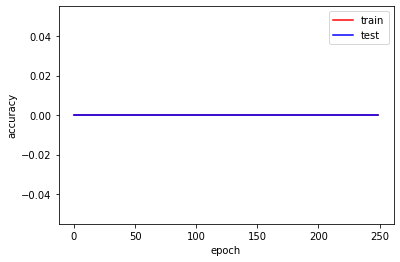

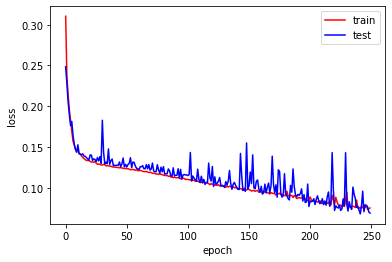

<Figure size 432x288 with 0 Axes>

In [36]:
epochsRange = range(250)

matplotlib.pyplot.plot(epochsRange, deathsModelHistory.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange, deathsModelHistory.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange, deathsModelHistory.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange, deathsModelHistory.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

##### Création d'un deuxième modèle avec plus de neurones, puis entrainement, et test 

On tente un deuxième modèle avec 6 niveaux de couches de neurones pour l'entrainement : 128, 64, 32, 16, 8, et 4. On observe que le modèle semble avoir des résultats du même ordre que le modèle précédent (cela se voit en comparant les tests manuels et en comparant les résultats du modèle affichés sur les graphiques). Mais ces résultats semblent quand même un peu meilleurs, par exemple le loss de la dernière époque d'apprentissage est souvent plus faible que celui pour le premier modèle (on le rappelle on cherche à minimer loss car il est la distance entre les résultats attendus et ceux prédits). 

<b>Pour conclure : ce deuixème modèle semble à peine plus concluant que le premier modèle.</b>

In [37]:
def createDeathsModel2():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(128, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(64, activation="relu")(h)
    h = keras.layers.Dense(32, activation="relu")(h)
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(8, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

In [38]:
deathsModel2 = createDeathsModel2() 
deathsModel2.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-2), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

In [39]:
deathsModelHistory2 = deathsModel2.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                       batch_size = 512,
                                       epochs = 250,
                                       validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

Epoch 1/250
1136/1136 [==============================] - 4s 3ms/step - loss: 0.3081 - accuracy: 0.0000e+00 - val_loss: 0.2220 - val_accuracy: 0.0000e+00
Epoch 2/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.1934 - accuracy: 0.0000e+00 - val_loss: 0.1762 - val_accuracy: 0.0000e+00
Epoch 3/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.1602 - accuracy: 0.0000e+00 - val_loss: 0.1722 - val_accuracy: 0.0000e+00
Epoch 4/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.1443 - accuracy: 0.0000e+00 - val_loss: 0.1488 - val_accuracy: 0.0000e+00
Epoch 5/250
1136/1136 [==============================] - 3s 2ms/step - loss: 0.1370 - accuracy: 0.0000e+00 - val_loss: 0.1344 - val_accuracy: 0.0000e+00
Epoch 6/250
1136/1136 [==============================] - 3s 2ms/step - loss: 0.1315 - accuracy: 0.0000e+00 - val_loss: 0.1516 - val_accuracy: 0.0000e+00
Epoch 7/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.129

1136/1136 [==============================] - 4s 4ms/step - loss: 0.0532 - accuracy: 0.0000e+00 - val_loss: 0.0938 - val_accuracy: 0.0000e+00
Epoch 55/250
1136/1136 [==============================] - 4s 4ms/step - loss: 0.0573 - accuracy: 0.0000e+00 - val_loss: 0.0524 - val_accuracy: 0.0000e+00
Epoch 56/250
1136/1136 [==============================] - 4s 3ms/step - loss: 0.0537 - accuracy: 0.0000e+00 - val_loss: 0.0457 - val_accuracy: 0.0000e+00
Epoch 57/250
1136/1136 [==============================] - 4s 4ms/step - loss: 0.0498 - accuracy: 0.0000e+00 - val_loss: 0.0495 - val_accuracy: 0.0000e+00
Epoch 58/250
1136/1136 [==============================] - 4s 3ms/step - loss: 0.0535 - accuracy: 0.0000e+00 - val_loss: 0.0489 - val_accuracy: 0.0000e+00
Epoch 59/250
1136/1136 [==============================] - 4s 3ms/step - loss: 0.0540 - accuracy: 0.0000e+00 - val_loss: 0.0595 - val_accuracy: 0.0000e+00
Epoch 60/250
1136/1136 [==============================] - 4s 3ms/step - loss: 0.0513 - ac

1136/1136 [==============================] - 3s 3ms/step - loss: 0.0341 - accuracy: 0.0000e+00 - val_loss: 0.0301 - val_accuracy: 0.0000e+00
Epoch 108/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0329 - accuracy: 0.0000e+00 - val_loss: 0.0310 - val_accuracy: 0.0000e+00
Epoch 109/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0349 - accuracy: 0.0000e+00 - val_loss: 0.0427 - val_accuracy: 0.0000e+00
Epoch 110/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0326 - accuracy: 0.0000e+00 - val_loss: 0.0353 - val_accuracy: 0.0000e+00
Epoch 111/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0327 - accuracy: 0.0000e+00 - val_loss: 0.0289 - val_accuracy: 0.0000e+00
Epoch 112/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0348 - accuracy: 0.0000e+00 - val_loss: 0.0410 - val_accuracy: 0.0000e+00
Epoch 113/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.034

Epoch 160/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0271 - accuracy: 0.0000e+00 - val_loss: 0.0269 - val_accuracy: 0.0000e+00
Epoch 161/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0269 - accuracy: 0.0000e+00 - val_loss: 0.0271 - val_accuracy: 0.0000e+00
Epoch 162/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0272 - accuracy: 0.0000e+00 - val_loss: 0.0294 - val_accuracy: 0.0000e+00
Epoch 163/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0274 - accuracy: 0.0000e+00 - val_loss: 0.0340 - val_accuracy: 0.0000e+00
Epoch 164/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0268 - accuracy: 0.0000e+00 - val_loss: 0.0253 - val_accuracy: 0.0000e+00
Epoch 165/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0264 - accuracy: 0.0000e+00 - val_loss: 0.0263 - val_accuracy: 0.0000e+00
Epoch 166/250
1136/1136 [==============================] - 3s 3ms/step

Epoch 213/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0276 - accuracy: 0.0000e+00 - val_loss: 0.0257 - val_accuracy: 0.0000e+00
Epoch 214/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0249 - accuracy: 0.0000e+00 - val_loss: 0.0266 - val_accuracy: 0.0000e+00
Epoch 215/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0242 - accuracy: 0.0000e+00 - val_loss: 0.0262 - val_accuracy: 0.0000e+00
Epoch 216/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0248 - accuracy: 0.0000e+00 - val_loss: 0.0260 - val_accuracy: 0.0000e+00
Epoch 217/250
1136/1136 [==============================] - 4s 4ms/step - loss: 0.0239 - accuracy: 0.0000e+00 - val_loss: 0.0265 - val_accuracy: 0.0000e+00
Epoch 218/250
1136/1136 [==============================] - 4s 3ms/step - loss: 0.0243 - accuracy: 0.0000e+00 - val_loss: 0.0243 - val_accuracy: 0.0000e+00
Epoch 219/250
1136/1136 [==============================] - 4s 3ms/step

In [40]:
deathsModelPredictions2 = deathsModel2.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))
comparisonResultAndPredictionDataFrame2 = deathsModelForPredictionRVDataFrame.copy()
comparisonResultAndPredictionDataFrame2['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions2)
print(comparisonResultAndPredictionDataFrame2.to_string())

        deaths  predicted_deaths
17330        0          0.929681
302403       2          2.019727
485589      16         11.548424
691070      38         30.861229
758104       9          3.581152
256496       0          4.297365
232359       6          3.866312
309578       0          0.994539
589763      16         25.888859
78162       29         25.110918
517686     120         81.506790
123122       0          2.909609
184168       0          3.882845
541487       7          4.707090
153836       0          0.785734
648339      10         22.185791
196702       1          8.410631
199972       0          0.954370
488563       5         41.267445
679465      46         44.062702
90959        1          2.608564
544169      61         29.963123
462215       0          2.719515
489859      19         20.262877
664940      24         29.463850
346408       2          1.199709
251892       0          2.890848
469875       2          2.508428
76459       22          1.688467
726099    

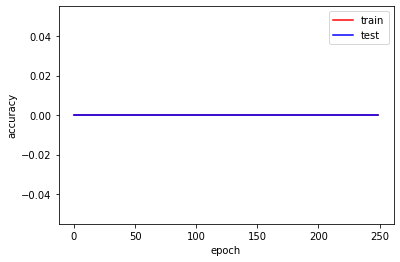

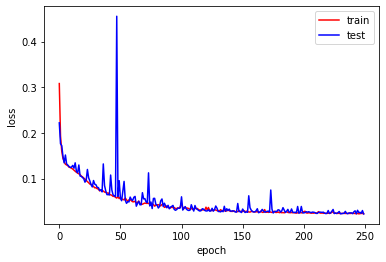

<Figure size 432x288 with 0 Axes>

In [41]:
epochsRange2 = range(250)

matplotlib.pyplot.plot(epochsRange2, deathsModelHistory2.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange2, deathsModelHistory2.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange2, deathsModelHistory2.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange2, deathsModelHistory2.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

###### Création d'un troisème modèle avec plus de paquets, puis entrainement, et test

On tente un troisième modèle avec la même architecture de neurones que le premier modèle, mais en faisant de plus gros paquets de 2048 lignes / observations. On peut voir que le loss final obtenu à la dernière époque est souvent supérieur aux loss des modèles précédents, cela est donc moins intéressant. On peut voir aussi que les prédictions du test manuel sont moins précises que celles des modèles précédents. 

<b>Pour conclure : ce modèle semble moins concluant que les deux modèles précédents.</b>

In [42]:
def createDeathsModel3():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(32, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

In [43]:
deathsModel3 = createDeathsModel3() 
deathsModel3.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-2), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

In [44]:
deathsModelHistory3 = deathsModel3.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                       batch_size = 2048,
                                       epochs = 250,
                                       validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

Epoch 1/250
284/284 [==============================] - 1s 4ms/step - loss: 0.3250 - accuracy: 0.0000e+00 - val_loss: 0.2460 - val_accuracy: 0.0000e+00
Epoch 2/250
284/284 [==============================] - 1s 3ms/step - loss: 0.2369 - accuracy: 0.0000e+00 - val_loss: 0.2349 - val_accuracy: 0.0000e+00
Epoch 3/250
284/284 [==============================] - 1s 3ms/step - loss: 0.2289 - accuracy: 0.0000e+00 - val_loss: 0.2315 - val_accuracy: 0.0000e+00
Epoch 4/250
284/284 [==============================] - 1s 4ms/step - loss: 0.2226 - accuracy: 0.0000e+00 - val_loss: 0.2230 - val_accuracy: 0.0000e+00
Epoch 5/250
284/284 [==============================] - 1s 3ms/step - loss: 0.2174 - accuracy: 0.0000e+00 - val_loss: 0.2174 - val_accuracy: 0.0000e+00
Epoch 6/250
284/284 [==============================] - 1s 4ms/step - loss: 0.2121 - accuracy: 0.0000e+00 - val_loss: 0.2124 - val_accuracy: 0.0000e+00
Epoch 7/250
284/284 [==============================] - 1s 3ms/step - loss: 0.2072 - accuracy: 

Epoch 55/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1279 - accuracy: 0.0000e+00 - val_loss: 0.1335 - val_accuracy: 0.0000e+00
Epoch 56/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1288 - accuracy: 0.0000e+00 - val_loss: 0.1304 - val_accuracy: 0.0000e+00
Epoch 57/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1279 - accuracy: 0.0000e+00 - val_loss: 0.1324 - val_accuracy: 0.0000e+00
Epoch 58/250
284/284 [==============================] - 1s 2ms/step - loss: 0.1276 - accuracy: 0.0000e+00 - val_loss: 0.1366 - val_accuracy: 0.0000e+00
Epoch 59/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1277 - accuracy: 0.0000e+00 - val_loss: 0.1301 - val_accuracy: 0.0000e+00
Epoch 60/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1279 - accuracy: 0.0000e+00 - val_loss: 0.1300 - val_accuracy: 0.0000e+00
Epoch 61/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1274 - acc

Epoch 109/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1207 - accuracy: 0.0000e+00 - val_loss: 0.1246 - val_accuracy: 0.0000e+00
Epoch 110/250
284/284 [==============================] - 1s 2ms/step - loss: 0.1206 - accuracy: 0.0000e+00 - val_loss: 0.1246 - val_accuracy: 0.0000e+00
Epoch 111/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1203 - accuracy: 0.0000e+00 - val_loss: 0.1249 - val_accuracy: 0.0000e+00
Epoch 112/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1197 - accuracy: 0.0000e+00 - val_loss: 0.1225 - val_accuracy: 0.0000e+00
Epoch 113/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1197 - accuracy: 0.0000e+00 - val_loss: 0.1269 - val_accuracy: 0.0000e+00
Epoch 114/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1195 - accuracy: 0.0000e+00 - val_loss: 0.1229 - val_accuracy: 0.0000e+00
Epoch 115/250
284/284 [==============================] - 1s 3ms/step - loss: 0.119

284/284 [==============================] - 1s 2ms/step - loss: 0.1105 - accuracy: 0.0000e+00 - val_loss: 0.1129 - val_accuracy: 0.0000e+00
Epoch 163/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1099 - accuracy: 0.0000e+00 - val_loss: 0.1198 - val_accuracy: 0.0000e+00
Epoch 164/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1104 - accuracy: 0.0000e+00 - val_loss: 0.1160 - val_accuracy: 0.0000e+00
Epoch 165/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1099 - accuracy: 0.0000e+00 - val_loss: 0.1125 - val_accuracy: 0.0000e+00
Epoch 166/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1096 - accuracy: 0.0000e+00 - val_loss: 0.1290 - val_accuracy: 0.0000e+00
Epoch 167/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1099 - accuracy: 0.0000e+00 - val_loss: 0.1162 - val_accuracy: 0.0000e+00
Epoch 168/250
284/284 [==============================] - 1s 2ms/step - loss: 0.1088 - accuracy: 

284/284 [==============================] - 1s 2ms/step - loss: 0.1032 - accuracy: 0.0000e+00 - val_loss: 0.1070 - val_accuracy: 0.0000e+00
Epoch 216/250
284/284 [==============================] - 1s 2ms/step - loss: 0.1032 - accuracy: 0.0000e+00 - val_loss: 0.1072 - val_accuracy: 0.0000e+00
Epoch 217/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1030 - accuracy: 0.0000e+00 - val_loss: 0.1062 - val_accuracy: 0.0000e+00
Epoch 218/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1029 - accuracy: 0.0000e+00 - val_loss: 0.1059 - val_accuracy: 0.0000e+00
Epoch 219/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1031 - accuracy: 0.0000e+00 - val_loss: 0.1080 - val_accuracy: 0.0000e+00
Epoch 220/250
284/284 [==============================] - 1s 2ms/step - loss: 0.1027 - accuracy: 0.0000e+00 - val_loss: 0.1090 - val_accuracy: 0.0000e+00
Epoch 221/250
284/284 [==============================] - 1s 3ms/step - loss: 0.1031 - accuracy: 

In [45]:
deathsModelPredictions3 = deathsModel3.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))
comparisonResultAndPredictionDataFrame3 = deathsModelForPredictionRVDataFrame.copy()
comparisonResultAndPredictionDataFrame3['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions3)
print(comparisonResultAndPredictionDataFrame3.to_string())

        deaths  predicted_deaths
17330        0         -4.970049
302403       2          9.920946
485589      16         13.481846
691070      38         28.604862
758104       9          6.236345
256496       0         13.056419
232359       6         14.195219
309578       0          1.542833
589763      16         28.639490
78162       29         14.038589
517686     120         60.817181
123122       0          2.907640
184168       0          1.153440
541487       7         14.005760
153836       0         -4.954768
648339      10         29.195963
196702       1         16.630875
199972       0         -6.861456
488563       5         42.470753
679465      46         50.579735
90959        1         -3.559839
544169      61         31.428308
462215       0         -0.316882
489859      19         15.563774
664940      24         33.867245
346408       2          4.886003
251892       0         -2.772501
469875       2          0.072164
76459       22          4.686613
726099    

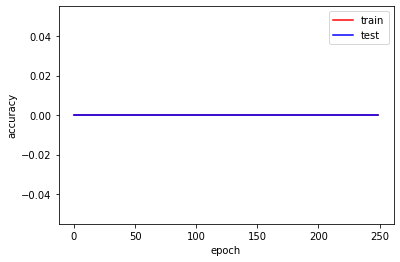

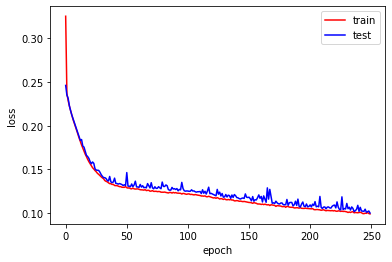

<Figure size 432x288 with 0 Axes>

In [46]:
epochsRange3 = range(250)

matplotlib.pyplot.plot(epochsRange3, deathsModelHistory3.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange3, deathsModelHistory3.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange3, deathsModelHistory3.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange3, deathsModelHistory3.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

###### Création d'un quatrième modèle avec un taux d'apprentissage de 5%, puis entrainement, et test

On tente un quatrième modèle avec la même architecture de neurones que le premier modèle mais avec un taux d'apprentissage de 5% (<=> 0.5 <=> 5e-1) et un nombre d'époques de 50 (suffissant pour ce qu'on veut démontrer). On peut voir que les résultats du modèle durant le test manuel sont très mauvais, le modèle semble toujours donner les mêmes résultats pour des nouvelles données. Du fait du taux d'apprentissage 5%, il y a eu du sur-apprentissage (overfitting).

<b>Pour conclure : le taux d'apprentissage a un fort impact sur le modèle, et ici un taux de 5% a produit du sur-apprentissage, le modèle est de fait très mauvais avec de nouvelles données, ce le pire modèle parmi autres faits jusqu'à présent.</b>

In [47]:
def createDeathsModel4():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(32, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

In [48]:
deathsModel4 = createDeathsModel4() 
deathsModel4.compile(optimizer = keras.optimizers.SGD(learning_rate=5e-1), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

In [49]:
deathsModelHistory4 = deathsModel4.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                       batch_size = 252,
                                       epochs = 50,
                                       validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

Epoch 1/50
2308/2308 [==============================] - 4s 2ms/step - loss: 1.0075 - accuracy: 0.0000e+00 - val_loss: 1.1395 - val_accuracy: 0.0000e+00
Epoch 2/50
2308/2308 [==============================] - 4s 2ms/step - loss: 1.0034 - accuracy: 0.0000e+00 - val_loss: 1.0384 - val_accuracy: 0.0000e+00
Epoch 3/50
2308/2308 [==============================] - 4s 2ms/step - loss: 1.0037 - accuracy: 0.0000e+00 - val_loss: 1.0355 - val_accuracy: 0.0000e+00
Epoch 4/50
2308/2308 [==============================] - 4s 2ms/step - loss: 1.0037 - accuracy: 0.0000e+00 - val_loss: 1.0369 - val_accuracy: 0.0000e+00
Epoch 5/50
2308/2308 [==============================] - 4s 2ms/step - loss: 1.0040 - accuracy: 0.0000e+00 - val_loss: 1.0444 - val_accuracy: 0.0000e+00
Epoch 6/50
2308/2308 [==============================] - 4s 2ms/step - loss: 1.0039 - accuracy: 0.0000e+00 - val_loss: 1.0421 - val_accuracy: 0.0000e+00
Epoch 7/50
2308/2308 [==============================] - 3s 1ms/step - loss: 1.0041 - acc

In [50]:
deathsModelPredictions4 = deathsModel4.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))
comparisonResultAndPredictionDataFrame4 = deathsModelForPredictionRVDataFrame.copy()
comparisonResultAndPredictionDataFrame4['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions4)
print(comparisonResultAndPredictionDataFrame4.to_string())

        deaths  predicted_deaths
17330        0         68.842857
302403       2         68.842857
485589      16         68.842857
691070      38         68.842857
758104       9         68.842857
256496       0         68.842857
232359       6         68.842857
309578       0         68.842857
589763      16         68.842857
78162       29         68.842857
517686     120         68.842857
123122       0         68.842857
184168       0         68.842857
541487       7         68.842857
153836       0         68.842857
648339      10         68.842857
196702       1         68.842857
199972       0         68.842857
488563       5         68.842857
679465      46         68.842857
90959        1         68.842857
544169      61         68.842857
462215       0         68.842857
489859      19         68.842857
664940      24         68.842857
346408       2         68.842857
251892       0         68.842857
469875       2         68.842857
76459       22         68.842857
726099    

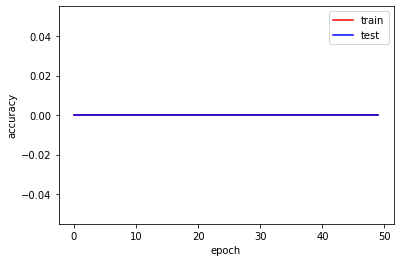

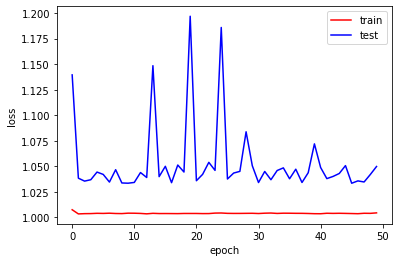

<Figure size 432x288 with 0 Axes>

In [51]:
epochsRange4 = range(50)

matplotlib.pyplot.plot(epochsRange4, deathsModelHistory4.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange4, deathsModelHistory4.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange4, deathsModelHistory4.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange4, deathsModelHistory4.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

###### Création d'un cinquième modèle avec un taux d'apprentissage de 0.1%, puis entrainement, et test

On tente un cinquième modèle avec la même architecture de neurones que le premier modèle mais avec un taux d'apprentissage de 0.1% (<=> 0.001 <=> 1e-3).  On peut voir que le modèle semble plus stable, plus exact dans ces prédictions plus que le loss est plus stable, et converge d'ailleurs vers des valeurs plus faibles que les modèles précédents, cela est intéressant.

<b>Pour conclure : ce cinquième modèle est meilleur et plus concluant que les quatres modèles précédents.</b>

In [52]:
def createDeathsModel5():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(32, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

In [53]:
deathsModel5 = createDeathsModel5() 
deathsModel5.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-3), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

In [54]:
deathsModelHistory5 = deathsModel5.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                       batch_size = 252,
                                       epochs = 250,
                                       validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

Epoch 1/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.0000e+00 - val_loss: 0.2669 - val_accuracy: 0.0000e+00
Epoch 2/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.2538 - accuracy: 0.0000e+00 - val_loss: 0.2507 - val_accuracy: 0.0000e+00
Epoch 3/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.2408 - accuracy: 0.0000e+00 - val_loss: 0.2388 - val_accuracy: 0.0000e+00
Epoch 4/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.2315 - accuracy: 0.0000e+00 - val_loss: 0.2304 - val_accuracy: 0.0000e+00
Epoch 5/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.2236 - accuracy: 0.0000e+00 - val_loss: 0.2229 - val_accuracy: 0.0000e+00
Epoch 6/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.2165 - accuracy: 0.0000e+00 - val_loss: 0.2159 - val_accuracy: 0.0000e+00
Epoch 7/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.209

2308/2308 [==============================] - 4s 2ms/step - loss: 0.1287 - accuracy: 0.0000e+00 - val_loss: 0.1316 - val_accuracy: 0.0000e+00
Epoch 55/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1288 - accuracy: 0.0000e+00 - val_loss: 0.1330 - val_accuracy: 0.0000e+00
Epoch 56/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1286 - accuracy: 0.0000e+00 - val_loss: 0.1321 - val_accuracy: 0.0000e+00
Epoch 57/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1284 - accuracy: 0.0000e+00 - val_loss: 0.1309 - val_accuracy: 0.0000e+00
Epoch 58/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1281 - accuracy: 0.0000e+00 - val_loss: 0.1340 - val_accuracy: 0.0000e+00
Epoch 59/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1282 - accuracy: 0.0000e+00 - val_loss: 0.1306 - val_accuracy: 0.0000e+00
Epoch 60/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1282 - ac

2308/2308 [==============================] - 4s 2ms/step - loss: 0.1230 - accuracy: 0.0000e+00 - val_loss: 0.1268 - val_accuracy: 0.0000e+00
Epoch 108/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1231 - accuracy: 0.0000e+00 - val_loss: 0.1272 - val_accuracy: 0.0000e+00
Epoch 109/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1228 - accuracy: 0.0000e+00 - val_loss: 0.1266 - val_accuracy: 0.0000e+00
Epoch 110/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1230 - accuracy: 0.0000e+00 - val_loss: 0.1300 - val_accuracy: 0.0000e+00
Epoch 111/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1224 - accuracy: 0.0000e+00 - val_loss: 0.1274 - val_accuracy: 0.0000e+00
Epoch 112/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1229 - accuracy: 0.0000e+00 - val_loss: 0.1260 - val_accuracy: 0.0000e+00
Epoch 113/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.122

Epoch 160/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1198 - accuracy: 0.0000e+00 - val_loss: 0.1246 - val_accuracy: 0.0000e+00
Epoch 161/250
2308/2308 [==============================] - 5s 2ms/step - loss: 0.1198 - accuracy: 0.0000e+00 - val_loss: 0.1268 - val_accuracy: 0.0000e+00
Epoch 162/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1199 - accuracy: 0.0000e+00 - val_loss: 0.1232 - val_accuracy: 0.0000e+00
Epoch 163/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1199 - accuracy: 0.0000e+00 - val_loss: 0.1268 - val_accuracy: 0.0000e+00
Epoch 164/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1195 - accuracy: 0.0000e+00 - val_loss: 0.1315 - val_accuracy: 0.0000e+00
Epoch 165/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1195 - accuracy: 0.0000e+00 - val_loss: 0.1270 - val_accuracy: 0.0000e+00
Epoch 166/250
2308/2308 [==============================] - 4s 2ms/step

Epoch 213/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1172 - accuracy: 0.0000e+00 - val_loss: 0.1214 - val_accuracy: 0.0000e+00
Epoch 214/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1170 - accuracy: 0.0000e+00 - val_loss: 0.1218 - val_accuracy: 0.0000e+00
Epoch 215/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1168 - accuracy: 0.0000e+00 - val_loss: 0.1210 - val_accuracy: 0.0000e+00
Epoch 216/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1168 - accuracy: 0.0000e+00 - val_loss: 0.1218 - val_accuracy: 0.0000e+00
Epoch 217/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1170 - accuracy: 0.0000e+00 - val_loss: 0.1291 - val_accuracy: 0.0000e+00
Epoch 218/250
2308/2308 [==============================] - 3s 2ms/step - loss: 0.1172 - accuracy: 0.0000e+00 - val_loss: 0.1223 - val_accuracy: 0.0000e+00
Epoch 219/250
2308/2308 [==============================] - 4s 2ms/step

In [55]:
deathsModelPredictions5 = deathsModel5.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))
comparisonResultAndPredictionDataFrame5 = deathsModelForPredictionRVDataFrame.copy()
comparisonResultAndPredictionDataFrame5['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions5)
print(comparisonResultAndPredictionDataFrame5.to_string())

        deaths  predicted_deaths
17330        0         -6.126677
302403       2         19.811390
485589      16         18.528643
691070      38         27.163889
758104       9          4.514978
256496       0          5.889535
232359       6          9.480516
309578       0         -0.708205
589763      16         28.821016
78162       29         16.423719
517686     120         72.264313
123122       0          2.785959
184168       0          3.493006
541487       7          9.122541
153836       0          2.277029
648339      10         22.297037
196702       1          7.779691
199972       0          1.094644
488563       5         40.546204
679465      46         59.031448
90959        1          2.760099
544169      61         25.648102
462215       0          5.813055
489859      19         15.233685
664940      24         35.575577
346408       2         -0.245596
251892       0         -3.616492
469875       2          7.189916
76459       22          7.507692
726099    

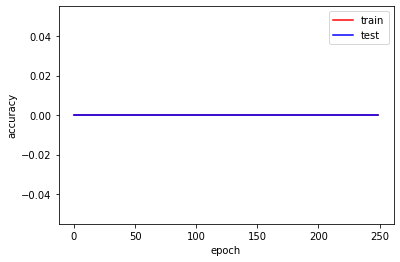

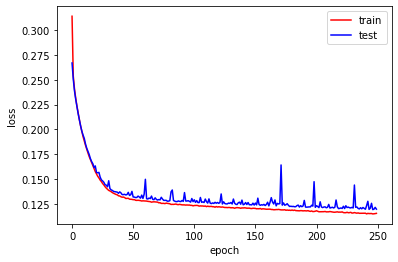

<Figure size 432x288 with 0 Axes>

In [56]:
epochsRange5 = range(250)

matplotlib.pyplot.plot(epochsRange5, deathsModelHistory5.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange5, deathsModelHistory5.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange5, deathsModelHistory5.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange5, deathsModelHistory5.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

###### Création d'un sixième modèle avec un taux d'apprentissage de 0.001%, puis entrainement, et test

On tente un cinquième modèle avec la même architecture de neurones que le premier modèle mais avec un taux d'apprentissage de 0.01% (<=> 0.0001 <=> 1e-4). Les résultats sont mitigés : le loss est plus grand que pour le cinquième modèle mais il est parfaitement stable, et prend plus de temps à converger. De plus, ce modèle est décevant avec les nouvelles données (test manuel), le modèle a sous-appris (underfitting).

<b>Pour conclure : le cinquième modèle reste le meilleur modèle pour cette étude, celui-ci a des résultats moins concluant avec les nouvelles données, il y a eu du sous-apprentissage.</b>

In [ ]:
def createDeathsModel6():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(32, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

In [58]:
deathsModel6 = createDeathsModel6() 
deathsModel6.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-4), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

In [59]:
deathsModelHistory6 = deathsModel6.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                       batch_size = 252,
                                       epochs = 250,
                                       validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

Epoch 1/250
2308/2308 [==============================] - 4s 2ms/step - loss: 1.0737 - accuracy: 0.0000e+00 - val_loss: 1.0315 - val_accuracy: 0.0000e+00
Epoch 2/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.9885 - accuracy: 0.0000e+00 - val_loss: 1.0160 - val_accuracy: 0.0000e+00
Epoch 3/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.9791 - accuracy: 0.0000e+00 - val_loss: 1.0093 - val_accuracy: 0.0000e+00
Epoch 4/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.9722 - accuracy: 0.0000e+00 - val_loss: 1.0012 - val_accuracy: 0.0000e+00
Epoch 5/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.9633 - accuracy: 0.0000e+00 - val_loss: 0.9922 - val_accuracy: 0.0000e+00
Epoch 6/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.9549 - accuracy: 0.0000e+00 - val_loss: 0.9842 - val_accuracy: 0.0000e+00
Epoch 7/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.947

2308/2308 [==============================] - 4s 2ms/step - loss: 0.6802 - accuracy: 0.0000e+00 - val_loss: 0.7076 - val_accuracy: 0.0000e+00
Epoch 55/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.6768 - accuracy: 0.0000e+00 - val_loss: 0.7042 - val_accuracy: 0.0000e+00
Epoch 56/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.6734 - accuracy: 0.0000e+00 - val_loss: 0.7008 - val_accuracy: 0.0000e+00
Epoch 57/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.6701 - accuracy: 0.0000e+00 - val_loss: 0.6975 - val_accuracy: 0.0000e+00
Epoch 58/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.6669 - accuracy: 0.0000e+00 - val_loss: 0.6942 - val_accuracy: 0.0000e+00
Epoch 59/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.6638 - accuracy: 0.0000e+00 - val_loss: 0.6911 - val_accuracy: 0.0000e+00
Epoch 60/250
2308/2308 [==============================] - 5s 2ms/step - loss: 0.6607 - ac

2308/2308 [==============================] - 3s 1ms/step - loss: 0.5582 - accuracy: 0.0000e+00 - val_loss: 0.5839 - val_accuracy: 0.0000e+00
Epoch 108/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.5566 - accuracy: 0.0000e+00 - val_loss: 0.5823 - val_accuracy: 0.0000e+00
Epoch 109/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.5551 - accuracy: 0.0000e+00 - val_loss: 0.5808 - val_accuracy: 0.0000e+00
Epoch 110/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.5536 - accuracy: 0.0000e+00 - val_loss: 0.5792 - val_accuracy: 0.0000e+00
Epoch 111/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.5521 - accuracy: 0.0000e+00 - val_loss: 0.5777 - val_accuracy: 0.0000e+00
Epoch 112/250
2308/2308 [==============================] - 3s 2ms/step - loss: 0.5506 - accuracy: 0.0000e+00 - val_loss: 0.5762 - val_accuracy: 0.0000e+00
Epoch 113/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.549

Epoch 160/250
2308/2308 [==============================] - 5s 2ms/step - loss: 0.4945 - accuracy: 0.0000e+00 - val_loss: 0.5197 - val_accuracy: 0.0000e+00
Epoch 161/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4936 - accuracy: 0.0000e+00 - val_loss: 0.5188 - val_accuracy: 0.0000e+00
Epoch 162/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4927 - accuracy: 0.0000e+00 - val_loss: 0.5179 - val_accuracy: 0.0000e+00
Epoch 163/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4918 - accuracy: 0.0000e+00 - val_loss: 0.5170 - val_accuracy: 0.0000e+00
Epoch 164/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4909 - accuracy: 0.0000e+00 - val_loss: 0.5161 - val_accuracy: 0.0000e+00
Epoch 165/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4900 - accuracy: 0.0000e+00 - val_loss: 0.5152 - val_accuracy: 0.0000e+00
Epoch 166/250
2308/2308 [==============================] - 4s 2ms/step

Epoch 213/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4535 - accuracy: 0.0000e+00 - val_loss: 0.4787 - val_accuracy: 0.0000e+00
Epoch 214/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4529 - accuracy: 0.0000e+00 - val_loss: 0.4780 - val_accuracy: 0.0000e+00
Epoch 215/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4522 - accuracy: 0.0000e+00 - val_loss: 0.4774 - val_accuracy: 0.0000e+00
Epoch 216/250
2308/2308 [==============================] - 3s 2ms/step - loss: 0.4516 - accuracy: 0.0000e+00 - val_loss: 0.4768 - val_accuracy: 0.0000e+00
Epoch 217/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4509 - accuracy: 0.0000e+00 - val_loss: 0.4761 - val_accuracy: 0.0000e+00
Epoch 218/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4503 - accuracy: 0.0000e+00 - val_loss: 0.4755 - val_accuracy: 0.0000e+00
Epoch 219/250
2308/2308 [==============================] - 3s 2ms/step

In [60]:
deathsModelPredictions6 = deathsModel6.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))
comparisonResultAndPredictionDataFrame6 = deathsModelForPredictionRVDataFrame.copy()
comparisonResultAndPredictionDataFrame6['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions6)
print(comparisonResultAndPredictionDataFrame6.to_string())

        deaths  predicted_deaths
17330        0         -9.264307
302403       2         11.314861
485589      16          8.888350
691070      38         24.577129
758104       9        -10.061380
256496       0         -7.281237
232359       6          0.677759
309578       0          5.263616
589763      16         36.697765
78162       29         25.433552
517686     120         75.355255
123122       0          8.609251
184168       0          1.030107
541487       7         19.208399
153836       0          3.724577
648339      10         30.994036
196702       1         16.012514
199972       0         16.705381
488563       5         33.708420
679465      46         78.372604
90959        1          2.324945
544169      61         41.696598
462215       0        -12.314383
489859      19         20.584568
664940      24         44.741154
346408       2          2.037367
251892       0         -0.532294
469875       2         -5.390841
76459       22          1.895895
726099    

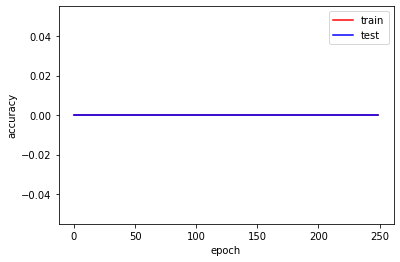

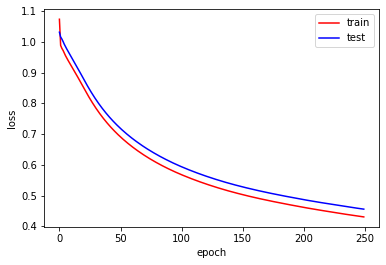

<Figure size 432x288 with 0 Axes>

In [61]:
epochsRange6 = range(250)

matplotlib.pyplot.plot(epochsRange6, deathsModelHistory6.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange6, deathsModelHistory6.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange6, deathsModelHistory6.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange6, deathsModelHistory6.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

#### Conception d'un modèle de prédiction du nombre de morts par classification

Toujours dans l'objectif de prédire le nombre de morts, on utilise désormais une autre méthode de fouille de données : la classification / le clustering. L'idée est que dans l'étude précédente par regression, à chaque fois pour comparer le nombre de morts attendu de celui préduit, nous étions obligé de comparer les valeurs par ordre de grandeur, car il était impossible de comparer les valeurs directement, les prédictions ne pouvant être exactes au chiffre près. Ainsi, en passant à de la classification dans cette deuxième étude, nous allons attribuer des classes de nombre de morts à chaque ligne / observation, ce qui permettra des comparaisons plus simples pour les tests. Les classes ayant un effet dès le départ de généralisation, chaque classe représente en fait un ordre de grandeur, un intervalle de valeur et pas une valeur précise. Et puis, pour des études de prédiction d'évolution d'épidémie prévoir de manière global avec des classes peut sembler plus intéressant.

###### Classification des observations par classes de nombres de morts

On détermine les valeurs extrêmes (min, max) pour le nombre de morts, on choisit des intervalles pour nos classes en fonction de ses valeurs, on attribue une classe à chaque ligne / observation. Nous faisons 10 classes : 
- classe 1 : 0 ;
- classe 2 : 1 à 100 ;
- classe 3 : 101 à 500 ;
- classe 4 : 501 à 1000 ;  
- classe 5 : 1001 à 2000 ;
- classe 6 : 2001 à 3000 ; 
- classe 7 : 3001 à 4000 ; 
- classe 8 : 4001 à 5000 ;
- classe 9 : 5001 à 6000 ;
- classe 10 : 6001 à 8000.

In [62]:
normalizedDataFrame['deaths'].min()

0

In [63]:
normalizedDataFrame['deaths'].max()

7886

In [64]:
normalizedDataFrame['deaths'].unique()

<IntegerArray>
[   0,    2,   16,   38,    9,    6,   29,  120,    7,   10,
 ...
 1741, 1284, 2686, 1592, 3834, 2894, 5045, 4404, 1980, 5332]
Length: 2926, dtype: Int64

In [65]:
len(normalizedDataFrame['deaths'].unique())

2926

In [66]:
deathsModelDataFrame2 = normalizedDataFrame.copy()
deathsModelDataFrame2

,date,county_fips,state_fips,cases,deaths
17330,15853536,54077,54,1,0
302403,15940800,29019,29,547,2
485589,15991776,28139,28,563,16
691070,16048800,13001,13,1288,38
758104,16066944,29203,29,340,9
...,...,...,...,...,...
304366,15941664,12125,12,99,2
593033,16021152,48217,48,724,15
440183,15978816,51095,51,662,17
463816,15985728,29119,29,1044,11


In [67]:
deathsModelDataFrame2['class_deaths'] = [2 
                                         if deaths >= 1 and deaths <= 100 else deaths 
                                         for deaths 
                                         in deathsModelDataFrame2['deaths']]

In [68]:
deathsModelDataFrame2['class_deaths'] = [3
                                         if deathsClass >= 101 and deathsClass <= 500
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [69]:
deathsModelDataFrame2['class_deaths'] = [4
                                         if deathsClass >= 501 and deathsClass <= 1000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [70]:
deathsModelDataFrame2['class_deaths'] = [5
                                         if deathsClass >= 1001 and deathsClass <= 2000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [71]:
deathsModelDataFrame2['class_deaths'] = [6
                                         if deathsClass >= 2001 and deathsClass <= 3000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [72]:
deathsModelDataFrame2['class_deaths'] = [7
                                         if deathsClass >= 3001 and deathsClass <= 4000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [73]:
deathsModelDataFrame2['class_deaths'] = [8
                                         if deathsClass >= 4001 and deathsClass <= 5000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [74]:
deathsModelDataFrame2['class_deaths'] = [9
                                         if deathsClass >= 5001 and deathsClass <= 6000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [75]:
deathsModelDataFrame2['class_deaths'] = [10
                                         if deathsClass >= 6001 and deathsClass <= 8000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [76]:
deathsModelDataFrame2['class_deaths'] = [1
                                         if deathsClass == 0
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']] 

In [77]:
deathsModelDataFrame2

,date,county_fips,state_fips,cases,deaths,class_deaths
17330,15853536,54077,54,1,0,1
302403,15940800,29019,29,547,2,2
485589,15991776,28139,28,563,16,2
691070,16048800,13001,13,1288,38,2
758104,16066944,29203,29,340,9,2
...,...,...,...,...,...,...
304366,15941664,12125,12,99,2,2
593033,16021152,48217,48,724,15,2
440183,15978816,51095,51,662,17,2
463816,15985728,29119,29,1044,11,2


In [78]:
deathsModelDataFrame2['class_deaths'].unique()

array([ 1,  2,  3,  6,  4,  5, 10,  8,  7,  9], dtype=int64)

In [79]:
len(deathsModelDataFrame2['class_deaths'].unique())

10

In [80]:
deathsModelDataFrame2 = deathsModelDataFrame2[['date', 'county_fips', 'state_fips', 'cases', 'class_deaths']]

In [81]:
deathsModelDataFrame2

,date,county_fips,state_fips,cases,class_deaths
17330,15853536,54077,54,1,1
302403,15940800,29019,29,547,2
485589,15991776,28139,28,563,2
691070,16048800,13001,13,1288,2
758104,16066944,29203,29,340,2
...,...,...,...,...,...
304366,15941664,12125,12,99,2
593033,16021152,48217,48,724,2
440183,15978816,51095,51,662,2
463816,15985728,29119,29,1044,2


###### Divisions des données pour faire les ensembles necéssaires

Comme pour le modèle précédent on produit les ensembles de données que va utiliser le modèle.

In [82]:
deathsModelForPredictionDataFrame2 = deathsModelDataFrame2.iloc[:100,]
deathsModelForPredictionDataFrame2

,date,county_fips,state_fips,cases,class_deaths
17330,15853536,54077,54,1,1
302403,15940800,29019,29,547,2
485589,15991776,28139,28,563,2
691070,16048800,13001,13,1288,2
758104,16066944,29203,29,340,2
...,...,...,...,...,...
709426,16053120,55061,55,1444,2
456873,15984000,19117,19,85,2
477206,15989184,47065,47,8136,2
76938,15874272,48239,48,6,1


In [83]:
deathsModelDataFrame2 = deathsModelDataFrame2.iloc[100:,]
deathsModelDataFrame2

,date,county_fips,state_fips,cases,class_deaths
557468,16011648,28157,28,305,2
64186,15870816,13257,13,30,2
350889,15954624,17117,17,101,2
324255,15946848,36101,36,278,2
420439,15973632,36021,36,551,2
...,...,...,...,...,...
304366,15941664,12125,12,99,2
593033,16021152,48217,48,724,2
440183,15978816,51095,51,662,2
463816,15985728,29119,29,1044,2


In [84]:
deathsModelForPredictionEVDataFrame2 = deathsModelForPredictionDataFrame2.iloc[:,:4]
deathsModelForPredictionEVDataFrame2

,date,county_fips,state_fips,cases
17330,15853536,54077,54,1
302403,15940800,29019,29,547
485589,15991776,28139,28,563
691070,16048800,13001,13,1288
758104,16066944,29203,29,340
...,...,...,...,...
709426,16053120,55061,55,1444
456873,15984000,19117,19,85
477206,15989184,47065,47,8136
76938,15874272,48239,48,6


In [85]:
deathsModelForPredictionRVDataFrame2 = deathsModelForPredictionDataFrame2.iloc[:,4:]
deathsModelForPredictionRVDataFrame2

,class_deaths
17330,1
302403,2
485589,2
691070,2
758104,2
...,...
709426,2
456873,2
477206,2
76938,1


In [86]:
deathsModelEVDataFrame2 = deathsModelDataFrame2.iloc[:,:4]
deathsModelEVDataFrame2

,date,county_fips,state_fips,cases
557468,16011648,28157,28,305
64186,15870816,13257,13,30
350889,15954624,17117,17,101
324255,15946848,36101,36,278
420439,15973632,36021,36,551
...,...,...,...,...
304366,15941664,12125,12,99
593033,16021152,48217,48,724
440183,15978816,51095,51,662
463816,15985728,29119,29,1044


In [87]:
deathsModelRVDataFrame2 = deathsModelDataFrame2.iloc[:,4:]
deathsModelRVDataFrame2

,class_deaths
557468,2
64186,2
350889,2
324255,2
420439,2
...,...
304366,2
593033,2
440183,2
463816,2


In [88]:
deathsModelEVTrainDataFrame2, deathsModelEVTestDataFrame2, deathsModelRVTrainDataFrame2, deathsModelRVTestDataFrame2 = train_test_split(deathsModelEVDataFrame2, deathsModelRVDataFrame2, test_size=0.25, random_state=1)

In [89]:
deathsModelEVTrainDataFrame2

,date,county_fips,state_fips,cases
447783,15981408,22007,22,631
402244,15968448,45027,45,836
516614,16000416,26081,26,9092
478473,15990048,16081,16,131
535695,16005600,30003,30,832
...,...,...,...,...
1061,15837984,26125,26,1
312748,15943392,48341,48,915
347921,15953760,18167,18,319
22365,15856128,27141,27,8


In [90]:
deathsModelRVTrainDataFrame2

,class_deaths
447783,2
402244,2
516614,3
478473,1
535695,2
...,...
1061,1
312748,2
347921,2
22365,1


In [91]:
deathsModelEVTestDataFrame2

,date,county_fips,state_fips,cases
167283,15901920,27093,27,43
4336,15845760,1017,1,1
665335,16041024,51069,51,1207
327249,15947712,34009,34,748
244018,15924384,18095,18,628
...,...,...,...,...
115376,15886368,29229,29,10
540634,16007328,8083,8,131
729308,16059168,21029,21,2509
424914,15975360,1121,1,1419


In [92]:
deathsModelRVTestDataFrame2

,class_deaths
167283,1
4336,1
665335,2
327249,2
244018,2
...,...
115376,1
540634,2
729308,2
424914,2


###### Seconde normalisation des données

Comme pour les données du modèle précédent, on effetue une seconde normalisation.

In [93]:
scalerExplanatoryVariable2 = preprocessing.StandardScaler()
encoderResultVariable = OneHotEncoder()

In [94]:
deathsModelEVTrainDataFrame2 = pandas.DataFrame(scalerExplanatoryVariable2.fit_transform(deathsModelEVTrainDataFrame2), 
                                                columns = deathsModelEVTrainDataFrame2.columns)
deathsModelEVTrainDataFrame2

,date,county_fips,state_fips,cases
0,0.283146,-0.547085,-0.541434,-0.123538
1,0.079231,0.956910,0.962976,-0.095758
2,0.582220,-0.280913,-0.279797,1.023011
3,0.419089,-0.934256,-0.933888,-0.191293
4,0.663786,-0.024672,-0.018161,-0.096300
...,...,...,...,...
581429,-1.973508,-0.278039,-0.279797,-0.208909
581430,-0.315004,1.173428,1.159203,-0.085053
581431,-0.151872,-0.797969,-0.803070,-0.165817
581432,-1.688028,-0.211659,-0.214388,-0.207960


In [95]:
deathsModelRVTrainDataFrame2 = pandas.DataFrame(encoderResultVariable.fit_transform(deathsModelRVTrainDataFrame2.values.reshape(-1,1)).toarray())
deathsModelRVTrainDataFrame2

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
581429,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581430,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581431,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581432,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
deathsModelEVTestDataFrame2 = pandas.DataFrame(scalerExplanatoryVariable2.fit_transform(deathsModelEVTestDataFrame2), 
                                               columns = deathsModelEVTestDataFrame2.columns)
deathsModelEVTestDataFrame2

,date,county_fips,state_fips,cases
0,-0.966419,-0.208506,-0.208105,-0.198763
1,-1.849049,-1.911217,-1.907876,-0.204225
2,1.219788,1.357079,1.360914,-0.047384
3,-0.246736,0.243095,0.249525,-0.107078
4,-0.613367,-0.796058,-0.796488,-0.122684
...,...,...,...,...
193807,-1.210839,-0.069030,-0.077354,-0.203055
193808,0.690210,-1.449821,-1.450246,-0.187319
193809,1.504946,-0.604473,-0.600360,0.121941
193810,0.187790,-1.904426,-1.907876,-0.019814


In [97]:
deathsModelRVTestDataFrame2 = pandas.DataFrame(encoderResultVariable.fit_transform(deathsModelRVTestDataFrame2.values.reshape(-1,1)).toarray())
deathsModelRVTestDataFrame2

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
193807,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193808,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193809,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193810,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Création de l'architecture du modèle

Comme pour le modèle précédent, on déclare une fonction de création du modèle,  avec cette fois-ci en sortie 10 neurones pour les 10 classes, et softmax pour avoir une probabilité pour les 10 classes.

In [98]:
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(128, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(10, activation='softmax')(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

###### Création et entrainement du modèle

On crée le modèle et on l'entraine avec ces paramètres : 0,1% d'apprentissage, 250 époques d'entrainement, des paquets de 252 lignes / observations.

In [99]:
deathsModel21 = createDeathsModel21()
deathsModel21.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
deathsModelHistory21 = deathsModel21.fit(deathsModelEVTrainDataFrame2, deathsModelRVTrainDataFrame2,
                                       batch_size = 252,
                                       epochs = 250,
                                       validation_data = (deathsModelEVTestDataFrame2, deathsModelRVTestDataFrame2))

Epoch 1/250
2308/2308 [==============================] - 7s 3ms/step - loss: 1.5077 - accuracy: 0.5907 - val_loss: 1.0713 - val_accuracy: 0.6387
Epoch 2/250
2308/2308 [==============================] - 5s 2ms/step - loss: 0.9394 - accuracy: 0.6614 - val_loss: 0.8631 - val_accuracy: 0.6673
Epoch 3/250
2308/2308 [==============================] - 5s 2ms/step - loss: 0.8257 - accuracy: 0.6674 - val_loss: 0.8022 - val_accuracy: 0.6683
Epoch 4/250
2308/2308 [==============================] - 5s 2ms/step - loss: 0.7817 - accuracy: 0.6694 - val_loss: 0.7700 - val_accuracy: 0.6698
Epoch 5/250
2308/2308 [==============================] - 6s 2ms/step - loss: 0.7553 - accuracy: 0.6717 - val_loss: 0.7484 - val_accuracy: 0.6719
Epoch 6/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.7368 - accuracy: 0.6742 - val_loss: 0.7326 - val_accuracy: 0.6742
Epoch 7/250
2308/2308 [==============================] - 5s 2ms/step - loss: 0.7227 - accuracy: 0.6764 - val_loss: 0.7202 - val_ac

2308/2308 [==============================] - 4s 2ms/step - loss: 0.5601 - accuracy: 0.7249 - val_loss: 0.5627 - val_accuracy: 0.7241
Epoch 58/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.5586 - accuracy: 0.7257 - val_loss: 0.5612 - val_accuracy: 0.7242
Epoch 59/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.5570 - accuracy: 0.7264 - val_loss: 0.5597 - val_accuracy: 0.7249
Epoch 60/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.5555 - accuracy: 0.7273 - val_loss: 0.5581 - val_accuracy: 0.7258
Epoch 61/250
2308/2308 [==============================] - 5s 2ms/step - loss: 0.5540 - accuracy: 0.7278 - val_loss: 0.5567 - val_accuracy: 0.7264
Epoch 62/250
2308/2308 [==============================] - 6s 3ms/step - loss: 0.5525 - accuracy: 0.7286 - val_loss: 0.5551 - val_accuracy: 0.7270
Epoch 63/250
2308/2308 [==============================] - 6s 3ms/step - loss: 0.5510 - accuracy: 0.7291 - val_loss: 0.5537 - val_accuracy

2308/2308 [==============================] - 5s 2ms/step - loss: 0.4971 - accuracy: 0.7615 - val_loss: 0.5010 - val_accuracy: 0.7526
Epoch 114/250
2308/2308 [==============================] - 5s 2ms/step - loss: 0.4963 - accuracy: 0.7619 - val_loss: 0.5001 - val_accuracy: 0.7534
Epoch 115/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4955 - accuracy: 0.7628 - val_loss: 0.4991 - val_accuracy: 0.7552
Epoch 116/250
2308/2308 [==============================] - 5s 2ms/step - loss: 0.4947 - accuracy: 0.7633 - val_loss: 0.4986 - val_accuracy: 0.7546
Epoch 117/250
2308/2308 [==============================] - 5s 2ms/step - loss: 0.4940 - accuracy: 0.7641 - val_loss: 0.4979 - val_accuracy: 0.7548
Epoch 118/250
2308/2308 [==============================] - 5s 2ms/step - loss: 0.4932 - accuracy: 0.7646 - val_loss: 0.4970 - val_accuracy: 0.7560
Epoch 119/250
2308/2308 [==============================] - 7s 3ms/step - loss: 0.4925 - accuracy: 0.7652 - val_loss: 0.4965 - val_ac

Epoch 169/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4642 - accuracy: 0.7957 - val_loss: 0.4690 - val_accuracy: 0.7793
Epoch 170/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4638 - accuracy: 0.7962 - val_loss: 0.4683 - val_accuracy: 0.7816
Epoch 171/250
2308/2308 [==============================] - 5s 2ms/step - loss: 0.4634 - accuracy: 0.7966 - val_loss: 0.4691 - val_accuracy: 0.7760
Epoch 172/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4630 - accuracy: 0.7969 - val_loss: 0.4682 - val_accuracy: 0.7784
Epoch 173/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4626 - accuracy: 0.7973 - val_loss: 0.4677 - val_accuracy: 0.7797
Epoch 174/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4621 - accuracy: 0.7979 - val_loss: 0.4673 - val_accuracy: 0.7802
Epoch 175/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4617 - accuracy: 0.7982 - val_loss: 0

Epoch 225/250
2308/2308 [==============================] - 5s 2ms/step - loss: 0.4453 - accuracy: 0.8077 - val_loss: 0.4517 - val_accuracy: 0.8020
Epoch 226/250
2308/2308 [==============================] - 5s 2ms/step - loss: 0.4451 - accuracy: 0.8077 - val_loss: 0.4518 - val_accuracy: 0.7990
Epoch 227/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4448 - accuracy: 0.8080 - val_loss: 0.4518 - val_accuracy: 0.8003
Epoch 228/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4446 - accuracy: 0.8081 - val_loss: 0.4517 - val_accuracy: 0.7996
Epoch 229/250
2308/2308 [==============================] - 5s 2ms/step - loss: 0.4443 - accuracy: 0.8083 - val_loss: 0.4505 - val_accuracy: 0.8037
Epoch 230/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4441 - accuracy: 0.8083 - val_loss: 0.4505 - val_accuracy: 0.8021
Epoch 231/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4438 - accuracy: 0.8083 - val_loss: 0

##### Test manuel de la justesse de prédiction du modèle

Comme pour le modèle précédent, on teste notre modèle par classification d'abord avec un test manuel. On touve un taux de mal-classification souvent autour de 20% - 25%, cela reste correct.

<b>Pour conclure : les résultats du test manuel sont plutôt concluant pour ce modèle.</b>

In [ ]:
deathsModelPredictions21 = deathsModel21.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame2))
comparisonResultAndPredictionDataFrame21 = deathsModelForPredictionRVDataFrame2.copy()
comparisonResultAndPredictionDataFrame21['predicted_class_deaths'] = encoderResultVariable.inverse_transform(deathsModelPredictions21)
print(comparisonResultAndPredictionDataFrame21.to_string())

In [ ]:
(len(comparisonResultAndPredictionDataFrame21[comparisonResultAndPredictionDataFrame21['class_deaths'] == 
                                           comparisonResultAndPredictionDataFrame21['predicted_class_deaths']]) / 
len(comparisonResultAndPredictionDataFrame21))

In [ ]:
(len(comparisonResultAndPredictionDataFrame21[comparisonResultAndPredictionDataFrame21['class_deaths'] != 
                                           comparisonResultAndPredictionDataFrame21['predicted_class_deaths']]) / 
len(comparisonResultAndPredictionDataFrame21))

###### Etude du modèle avec des graphiques

Comme pour le modèle précédent, on étudie la qualité de notre modèle avec des garphiques des résultats d'entrainement et de test du modèle. Le loss trouvé est correct, et il ne prend pas trop de temps pour converger.

<b>Pour conclure : ce modèle est assez concluant.</b>

In [ ]:
epochsRange21 = range(250)

matplotlib.pyplot.plot(epochsRange21, deathsModelHistory21.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange21, deathsModelHistory21.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange21, deathsModelHistory21.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange21, deathsModelHistory21.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()